In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#Loading data from csv file to a Pandas DataFrame
data = pd.read_csv("/Users/jianingjin/Desktop/data analysis/Python/gld_price_data.csv")

In [3]:
#Data Glimpse
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.shape

(2290, 6)

In [6]:
#checking the number of missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#getting the statistical measures of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
correlation = data.corr()

In [9]:
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<AxesSubplot:>

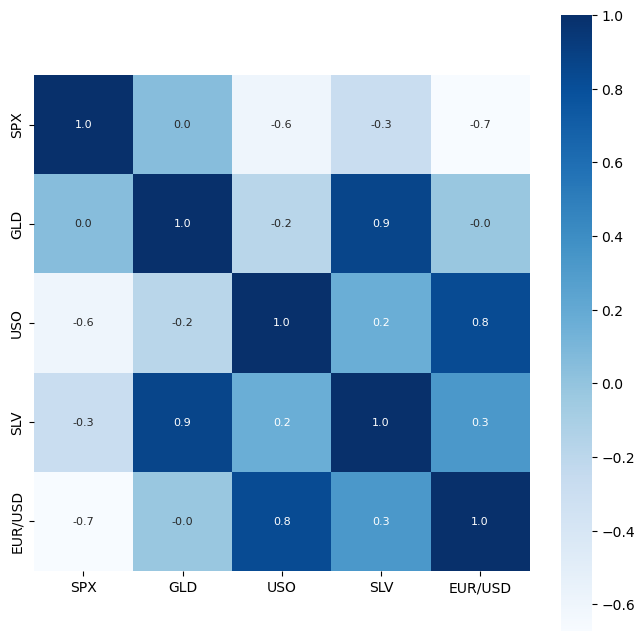

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/Users/jianingjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

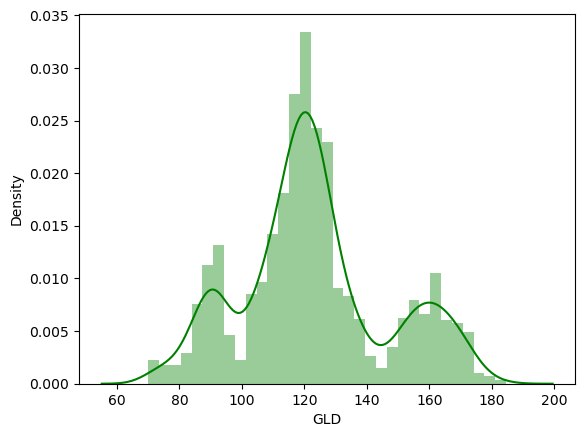

In [12]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'],color='green')

In [13]:
X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [15]:
regressor = RandomForestRegressor(n_estimators=100)

In [16]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [17]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [18]:
print(test_data_prediction)

[168.54089924  82.13449966 116.08979993 127.76520069 120.88040137
 154.8810977  150.46839915 125.98400052 117.50169905 125.94130079
 116.71570096 171.97950103 142.00299915 167.89259883 115.14729991
 117.88870025 138.2377028  169.47430046 160.25130306 156.23719989
 155.17669989 125.24140025 176.2972999  156.8156032  125.24420033
  93.73629983  77.51770042 120.68500008 119.10359949 167.36659975
  88.12870053 125.25339997  91.30880089 117.71520006 121.09069921
 136.18620048 115.62900049 115.24060042 147.60079972 107.41760078
 104.48780253  87.21609775 126.42140083 118.16279981 153.13189912
 119.58739988 108.34760022 108.06699852  93.14690058 126.99439801
  74.84040059 113.51999906 121.16739998 111.3808992  118.89529907
 120.93549911 158.91900089 167.25030046 146.8164967   86.02419891
  94.36720046  86.69289909  90.62540018 118.72730101 126.41730056
 127.42869995 169.35309954 122.24389914 117.45879896  98.6556001
 168.29000217 142.89479817 131.76940251 121.22670212 121.74169938
 119.824000

In [19]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890262353295889


In [20]:
Y_test = list(Y_test)

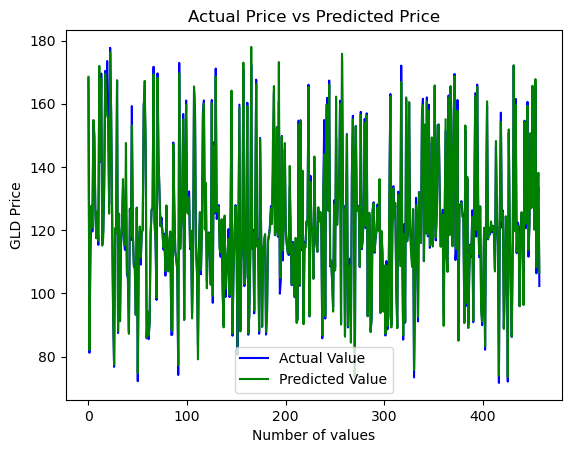

In [21]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()